## Liver like satellite

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = '/home/farzin/biotech/gdc/tmp_tiled/'

In [4]:
ls {PATH}

models/  tmp/  train/  valid/


In [5]:
from fastai.plots import *

In [6]:
def get_1st(path): return glob(f'{path}/*.*')[0]

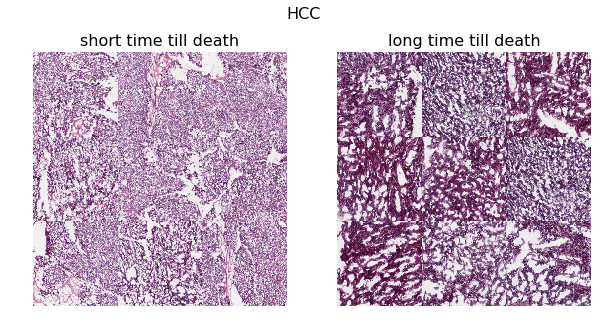

In [7]:
list_paths = [f"{PATH}train/0.0/TCGA-CC-5264-01A-01-BS1_6.png", \
              f"{PATH}train/1.0/TCGA-NI-A4U2-11A-01-TS1_14.png"]
titles=["short time till death", "long time till death"]
plots_from_files(list_paths, titles=titles, maintitle="HCC")

In [8]:
#from planet import f2
#metrics=[f2] #I don't think this is right for our data
f_model = resnet34

We use a different set of data augmentations for this dataset - we also allow vertical flips, since we don't expect vertical orientation of satellite images to change our classifications.

In [9]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=2.25)
    #data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
    return ImageClassifierData.from_paths(PATH, tfms=tfms)

In [10]:
data = get_data(256) #resize all images to 256 square

Example of pulling/viewing data

In [11]:
x,y = next(iter(data.val_dl))

In [12]:
x.shape

torch.Size([64, 3, 256, 256])

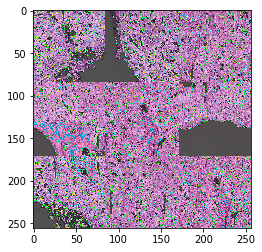

In [13]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4);

In [14]:
learn = ConvLearner.pretrained(f_model, data)

In [ ]:
lrf=learn.lr_find()
learn.sched.plot()

In [15]:
lr = 0.025

In [16]:
learn.fit(lr, 2, cycle_len=3, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=9), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.858089   0.645441   0.607143  
    1      0.765137   0.661359   0.633929                  
    2      0.715865   0.671718   0.633929                  
    3      0.686722   0.761293   0.620536                  
    4      0.693687   0.664645   0.638393                  
    5      0.663568   0.793386   0.580357                  
    6      0.646838   0.764749   0.595982                  
    7      0.630134   0.732404   0.627232                  
    8      0.610547   0.732305   0.633929                  



[0.7323045, 0.6339285714285714]

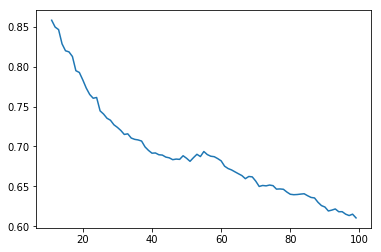

In [17]:
learn.sched.plot_loss()

In [ ]:
lrs = np.array([lr/9,lr/3,lr])

In [ ]:
learn.unfreeze()
learn.fit(lrs, 4, cycle_len=3, cycle_mult=2)

In [ ]:
learn.save(f'{sz}')

In [ ]:
learn.sched.plot_loss()

In [ ]:
learn.sched.plot_lr()

In [ ]:
sz=128

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
sz=256

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [ ]:
f2(preds,y)

### End